In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Reading the CSV file 
df=pd.read_csv(r"Advertising.csv",header=0,index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [7]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [50]:
df.describe(include='all')
df.dtypes
df.info()
df.isnull().sum()
#df.isnull()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

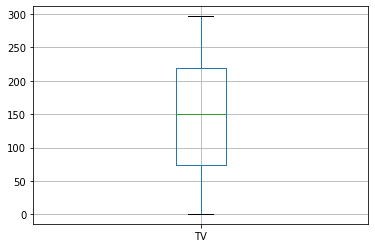

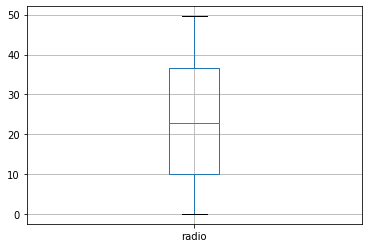

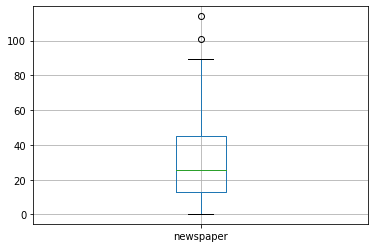

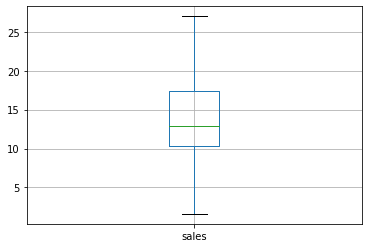

In [9]:
#Assumtion 1- there should be no outliers in data 
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [10]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

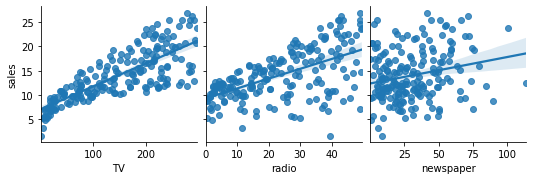

In [11]:
sns.pairplot(df,x_vars=['TV', 'radio', 'newspaper',],y_vars="sales",kind='reg')
plt.show()

In [12]:
#create X and Y

X=df[['TV', 'radio', 'newspaper']]
Y=df['sales']


In [31]:
from sklearn.model_selection import train_test_split
#split the data into train and test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [32]:
from sklearn.linear_model import LinearRegression
#create a model obj
lm=LinearRegression()
#train the model obj
lm.fit(X_train,Y_train)
#print interceot and coefficient
print(lm.intercept_)
print(lm.coef_)

3.254097114418883
[ 0.0437726   0.19343299 -0.00222879]


In [33]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)



0.8353672324670594
2.5885298446278098
0.8328473431680857


In [ ]:
lm.n_iter_ #total no of eopoks

In [ ]:
lm.t_   #total no of iterations

In [ ]:
#Assumption of Normalityy :dependent variable should follow approx bell shaped curve-to check the normality of the curve
#if the curve is not noprmal or skewed the need to log(next line)
sns.displot(Y,kde=True)

In [ ]:
#to be used when the assumption of normality(bell shapped curve do not satisfy)
#prefred over square root as it gives more heavier or poky curve where as this(log) gives a smoother curve
"""
#log transformation 
#log function from numpy 
#Y_log=np.log(Y)
""""""

if 0 value is there is Y the use Log 1p instead of Log as if we do log(0) which is -00

In [ ]:
#to check if the data is heavyly skewed 9right or left)

X.hist(bins=20)

In [34]:
from sklearn.linear_model import Ridge
#create a model obj
lm=Ridge()
#train the model obj
lm.fit(X_train,Y_train)
#print interceot and coefficient
print(lm.intercept_)
print(lm.coef_)

3.2541996504791584
[ 0.0437726   0.19342655 -0.00222742]


In [35]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)



0.8353686978689225
2.588518324306081
0.8328488309995693


In [25]:
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04377260306304603), ('radio', 0.19343298611600765), ('newspaper', -0.0022287928056053743)]


In [36]:
X_train.shape

(160, 3)

In [ ]:
X1=100
X2=1000
X3=np.log1p(0)
Y_pred1=3.353+(0.437*X1)+(.19303*X2)+(-.4895*X3)
Y_pred1

In [37]:
#predict using the mode;
Y_pred=lm.predict(X_test)
Y_pred

array([18.16245391, 12.92652317, 18.05310583, 23.64456781, 20.70427081,
       14.28225391, 14.94495534, 21.38219547, 21.1749383 , 12.73100687,
       24.00301993,  7.21553865, 12.2475655 , 19.24339936, 19.38241343,
       13.45636091, 19.6246441 ,  9.2530879 , 21.13256894, 20.90746193,
       15.53483293, 10.92515347, 22.82945286, 15.8121711 , 17.42522236,
        8.16221866, 11.89769872, 12.70328706, 21.74124009,  7.96215012,
       12.50103034, 20.45525511,  4.7213209 ,  4.72273082, 16.75300902,
       15.75816807,  6.74426955, 17.73481459,  9.01600544, 13.617696  ])

In [38]:
lm.score(X_train,Y_train) #r square data should be 
#Y_pred=lm.predict(X_train)----> predict on basis of xtrain
#score=r2_score(Y_train,Y_pred)----->compair x train and y pred to give score value

0.9209087550181967

In [39]:
new_df=pd.DataFrame()
new_df=X_test

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df

<ipython-input-39-b173074c47be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Actual sales']=Y_test
<ipython-input-39-b173074c47be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Predicted sales']=Y_pred


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,9.3,18.4,18.162454
6,8.7,48.9,75.0,7.2,12.926523
21,218.4,27.7,53.4,18.0,18.053106
199,283.6,42.0,66.2,25.5,23.644568
53,216.4,41.7,39.6,22.6,20.704271
20,147.3,23.9,19.1,14.6,14.282254
163,188.4,18.1,25.6,14.9,14.944955
56,198.9,49.4,60.0,23.7,21.382195
70,216.8,43.9,27.2,22.3,21.174938
3,17.2,45.9,69.3,9.3,12.731007


In [ ]:
print((Y_test).min())
print((Y_test).max())

In [40]:
from sklearn.model_selection import train_test_split
#split the data into train and test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [41]:
from sklearn.linear_model import Lasso
#create a model obj
lm=Lasso()
#train the model obj
lm.fit(X_train,Y_train)
#print interceot and coefficient
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [42]:
Y_pred=lm.predict(X_test)
lm.score(X_train,Y_train)
new_df=pd.DataFrame()
new_df=X_test

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df

<ipython-input-42-55703a590bf8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Actual sales']=Y_test
<ipython-input-42-55703a590bf8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Predicted sales']=Y_pred


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,9.3,18.4,18.064296
6,8.7,48.9,75.0,7.2,12.892911
21,218.4,27.7,53.4,18.0,18.062410
199,283.6,42.0,66.2,25.5,23.590220
53,216.4,41.7,39.6,22.6,20.602407
20,147.3,23.9,19.1,14.6,14.247653
163,188.4,18.1,25.6,14.9,14.952159
56,198.9,49.4,60.0,23.7,21.283976
70,216.8,43.9,27.2,22.3,21.032709
3,17.2,45.9,69.3,9.3,12.700731


In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


In [ ]:
new_df=pd.DataFrame()
new_df=X_train
new_df["sales"]=Y_train
new_df